In [417]:
# Turn on multi-threading on your computer for faster calculation 
%env OMP_NUM_THREADS = 4

env: OMP_NUM_THREADS=4


In [418]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")
from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt

import dmba

%matplotlib inline



In [384]:
import os
print(os.listdir()) 
os.chdir('C:/Users/priya/OneDrive/Desktop/Spring 23/BAN 620 Data Mining/Case Assignments/Case 3')
df = pd.read_csv('RMCase.csv', header = 0) #, encoding = "ISO-8859-1")

df.head() 

['HW 3.pdf', 'RMCase.csv', 'RMCase.xlsx', 'STC Case_HBR.pdf', 'STC_Starter code.ipynb']


,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0.0,1.0,A,1/14/2011,1/14/2011,...,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0
1,2,HC,8.0,8.0,AZ,0.0,7.0,A,1/14/2011,1/21/2011,...,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0
2,3,HD,8.0,8.0,FL,0.0,3.0,A,1/15/2011,1/17/2011,...,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0
3,4,HN,9.0,12.0,VA,1.0,3.0,B,1/15/2011,1/17/2011,...,Undefined,Undefined,Undefined->Undefined,H,0.0,NaN,1.000000,0.0,NaN,0.0
4,5,HD,6.0,8.0,FL,0.0,6.0,T,1/16/2011,1/21/2011,...,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0


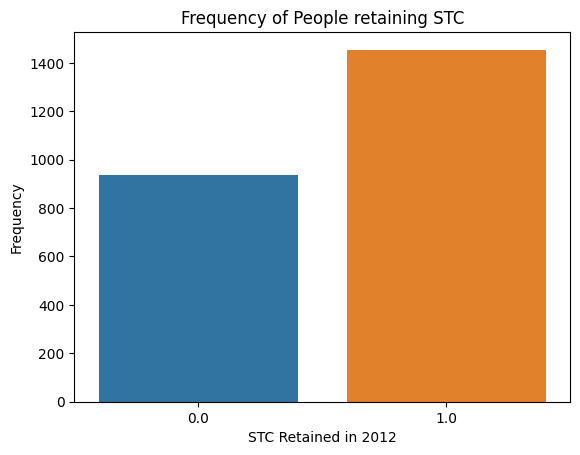

In [484]:
# Get the frequency of each value in the Retained column
Retained_counts = df['Retained.in.2012.'].value_counts()

# Create a bar chart using seaborn
sns.barplot(x=Retained_counts.index, y=Retained_counts.values)

# Set the chart title and labels
plt.title('Frequency of People retaining STC')
plt.xlabel('STC Retained in 2012')
plt.ylabel('Frequency')

# Show the chart
plt.show()

In [419]:
# "Cleaning" the data -- part 1: converting data types that should be categorical into "category"

df['From.Grade'] = df['From.Grade'].astype('category')
df['To.Grade'] = df['To.Grade'].astype('category')
df['Is.Non.Annual.'] = df['Is.Non.Annual.'].astype('category')
df['Parent.Meeting.Flag'] = df['Parent.Meeting.Flag'].astype('category')
df['Days'] = df['Days'].astype('category')
df['CRM.Segment'] = df['CRM.Segment'].astype('category')
df['MDR.High.Grade'] = df['MDR.High.Grade'].astype('category')
df['School.Sponsor'] = df['School.Sponsor'].astype('category')
df['NumberOfMeetingswithParents'] = df['NumberOfMeetingswithParents'].astype('category')
df['SingleGradeTripFlag'] = df['SingleGradeTripFlag'].astype('category')
df['SchoolSizeIndicator'] = df['SchoolSizeIndicator'].astype('category')
df['DepartureMonth'] = df['DepartureMonth'].astype('category')
df['SPR.New.Existing'] = df['SPR.New.Existing'].astype('category')
df['SPR.Product.Type'] = df['SPR.Product.Type'].astype('category')



df.info() # let's check the result

#I only converted some variables which I thought would be useful. If you feel other variables that may be useful have their types incorrect, 
#please convert them too!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 65 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID                              2390 non-null   object  
 1   Program.Code                    2389 non-null   object  
 2   From.Grade                      2262 non-null   category
 3   To.Grade                        2239 non-null   category
 4   Group.State                     2389 non-null   object  
 5   Is.Non.Annual.                  2389 non-null   category
 6   Days                            2389 non-null   category
 7   Travel.Type                     2389 non-null   object  
 8   Departure.Date                  2389 non-null   object  
 9   Return.Date                     2389 non-null   object  
 10  Deposit.Date                    2389 non-null   object  
 11  Special.Pay                     470 non-null    object  
 12  Tuition             

In [ ]:
['FRP.Active', 'FRP.Cancelled', 'Cancelled.Pax', 'FPP.to.PAX', 'From.Grade_Imputed','Is.Non.Annual._Imputed',
 'Days_Imputed', 'School.Sponsor_Imputed','SingleGradeTripFlag_Imputed',
 'SchoolSizeIndicator','DepartureMonth','SPR.New.Existing','SPR.Product.Type']

In [420]:
df['FRP.Cancelled'].fillna(df['FRP.Cancelled'].median())
df['FRP.Active'].fillna(df['FRP.Active'].median())
df['Cancelled.Pax'].fillna(df['Cancelled.Pax'].median())
df['FPP.to.PAX'].fillna(df['FPP.to.PAX'].median())

0       0.936508
1       0.880000
2       0.888889
3       1.000000
4       0.910112
          ...   
2387    0.941176
2388    0.884615
2389    0.909091
2390    0.909091
2391    0.909091
Name: FPP.to.PAX, Length: 2392, dtype: float64

In [421]:
pd.get_dummies(df['From.Grade'], drop_first=True)
pd.get_dummies(df['Is.Non.Annual.'], drop_first=True)
pd.get_dummies(df['Days'], drop_first=True)
pd.get_dummies(df['School.Sponsor'], drop_first=True)
pd.get_dummies(df['SingleGradeTripFlag'], drop_first=True)
pd.get_dummies(df['SchoolSizeIndicator'], drop_first=True)
pd.get_dummies(df['DepartureMonth'], drop_first=True)
pd.get_dummies(df['SPR.New.Existing'], drop_first=True)
pd.get_dummies(df['SPR.Product.Type'], drop_first=True)

,Costa Rica,East Coast,Other_SPR.Product.Type,Science
0,0,0,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
2387,0,0,0,0
2388,0,1,0,0
2389,0,0,0,0
2390,0,0,0,0


In [422]:
# "Cleaning" the data -- part 3: combining rare categories ("levels")

# Here is a custom function that we will call CombineRareCategories
# this function has two arguments: the name of the dataframe (data) and the minimal number of datapoints to remain a separate category (mincount)
# this function will loop through all the columns in the dataframe, and will combine all categories that appear in the data les than mincount number of times into (Other)

def CombineRareCategories(data, mincount):
    for col in data.columns:
        if (type(data[col][0]) == str):
            for index, row in pd.DataFrame(data[col].value_counts()).iterrows():
                if ( row[0] < mincount):
                    df[col].replace(index, 'Other_' + col, inplace = True)
                else:
                    None

# lets apply this functino to our data with mincount=20. You can try lowering this cut-off too!                    
CombineRareCategories(df, 20)        

df[0:10] #lets check the result

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,Retained.in.2012.,From.Grade_Imputed,Is.Non.Annual._Imputed,Days_Imputed,School.Sponsor_Imputed,SingleGradeTripFlag_Imputed,SchoolSizeIndicator_Imputed,DepartureMonth_Imputed,SPR.New.Existing_Imputed,SPR.Product.Type_Imputed
0,Other_ID,HS,4.0,4.0,CA,0.0,1.0,A,Other_Departure.Date,Other_Return.Date,...,1.0,4.0,0.0,1.0,1.0,1.0,3,7,0,1
1,Other_ID,HC,8.0,8.0,AZ,0.0,7.0,A,Other_Departure.Date,Other_Return.Date,...,1.0,8.0,0.0,7.0,0.0,1.0,3,7,0,3
2,Other_ID,HD,8.0,8.0,FL,0.0,3.0,A,Other_Departure.Date,Other_Return.Date,...,1.0,8.0,0.0,3.0,0.0,1.0,3,7,0,3
3,Other_ID,HN,9.0,12.0,Other_Group.State,1.0,3.0,B,Other_Departure.Date,Other_Return.Date,...,0.0,9.0,1.0,3.0,0.0,0.0,1,7,0,3
4,Other_ID,HD,6.0,8.0,FL,0.0,6.0,Other_Travel.Type,Other_Departure.Date,Other_Return.Date,...,0.0,6.0,0.0,6.0,0.0,0.0,2,7,0,3
5,Other_ID,HC,10.0,12.0,LA,0.0,4.0,A,Other_Departure.Date,Other_Return.Date,...,1.0,10.0,0.0,4.0,0.0,0.0,3,7,1,3
6,Other_ID,SG,11.0,12.0,MA,1.0,6.0,A,Other_Departure.Date,Other_Return.Date,...,0.0,11.0,1.0,6.0,0.0,0.0,0,7,0,6
7,Other_ID,Other_Program.Code,9.0,9.0,Other_Group.State,0.0,8.0,A,Other_Departure.Date,Other_Return.Date,...,0.0,9.0,0.0,8.0,0.0,1.0,1,7,0,3
8,Other_ID,Other_Program.Code,8.0,8.0,AZ,0.0,8.0,A,Other_Departure.Date,Other_Return.Date,...,1.0,8.0,0.0,8.0,0.0,1.0,1,7,0,3
9,Other_ID,HD,8.0,8.0,TX,0.0,4.0,A,Other_Departure.Date,Other_Return.Date,...,1.0,8.0,0.0,4.0,0.0,1.0,2,2,0,3


In [423]:
pd.get_dummies(df['SPR.Product.Type'], drop_first=True)

,Costa Rica,East Coast,Other_SPR.Product.Type,Science
0,0,0,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
2387,0,0,0,0
2388,0,1,0,0
2389,0,0,0,0
2390,0,0,0,0


In [424]:
X=['FRP.Active', 'FRP.Cancelled', 'Cancelled.Pax', 'FPP.to.PAX',  'From.Grade','Is.Non.Annual.','Days','School.Sponsor','SingleGradeTripFlag', 'SchoolSizeIndicator','DepartureMonth','SPR.New.Existing','SPR.Product.Type','Total.School.Enrollment','SPR.Group.Revenue','FPP.to.School.enrollment']
pd.DataFrame(df[X]).isna().sum()

df.dropna(subset=['FRP.Active', 'FRP.Cancelled', 'Cancelled.Pax', 'FPP.to.PAX',  'From.Grade','Is.Non.Annual.','Days','School.Sponsor','SingleGradeTripFlag', 'SchoolSizeIndicator','DepartureMonth','SPR.New.Existing','SPR.Product.Type'])

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,Retained.in.2012.,From.Grade_Imputed,Is.Non.Annual._Imputed,Days_Imputed,School.Sponsor_Imputed,SingleGradeTripFlag_Imputed,SchoolSizeIndicator_Imputed,DepartureMonth_Imputed,SPR.New.Existing_Imputed,SPR.Product.Type_Imputed
0,Other_ID,HS,4.0,4.0,CA,0.0,1.0,A,Other_Departure.Date,Other_Return.Date,...,1.0,4.0,0.0,1.0,1.0,1.0,3,7,0,1
1,Other_ID,HC,8.0,8.0,AZ,0.0,7.0,A,Other_Departure.Date,Other_Return.Date,...,1.0,8.0,0.0,7.0,0.0,1.0,3,7,0,3
2,Other_ID,HD,8.0,8.0,FL,0.0,3.0,A,Other_Departure.Date,Other_Return.Date,...,1.0,8.0,0.0,3.0,0.0,1.0,3,7,0,3
4,Other_ID,HD,6.0,8.0,FL,0.0,6.0,Other_Travel.Type,Other_Departure.Date,Other_Return.Date,...,0.0,6.0,0.0,6.0,0.0,0.0,2,7,0,3
5,Other_ID,HC,10.0,12.0,LA,0.0,4.0,A,Other_Departure.Date,Other_Return.Date,...,1.0,10.0,0.0,4.0,0.0,0.0,3,7,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381,Other_ID,SC,6.0,8.0,Other_Group.State,0.0,7.0,A,Other_Departure.Date,Other_Return.Date,...,0.0,6.0,0.0,7.0,0.0,0.0,3,6,0,2
2382,Other_ID,SC,9.0,12.0,CA,0.0,7.0,A,Other_Departure.Date,Other_Return.Date,...,1.0,9.0,0.0,7.0,0.0,0.0,3,6,1,2
2384,Other_ID,HC,7.0,8.0,CA,0.0,5.0,A,Other_Departure.Date,Other_Return.Date,...,0.0,7.0,0.0,5.0,0.0,0.0,3,6,0,3
2385,Other_ID,HD,8.0,8.0,CA,0.0,5.0,A,Other_Departure.Date,Other_Return.Date,...,1.0,8.0,0.0,5.0,0.0,1.0,1,6,0,3


In [425]:
#trainData.fillna(trainData.median(), inplace=True)
df.fillna(df.median(), inplace=True)

In [426]:
pd.DataFrame(df[X]).isna().sum()



FRP.Active                    0
FRP.Cancelled                 0
Cancelled.Pax                 0
FPP.to.PAX                    0
From.Grade                  130
Is.Non.Annual.                3
Days                          3
School.Sponsor                3
SingleGradeTripFlag           3
SchoolSizeIndicator          94
DepartureMonth                3
SPR.New.Existing              3
SPR.Product.Type              3
Total.School.Enrollment       0
SPR.Group.Revenue             0
FPP.to.School.enrollment      0
dtype: int64

In [427]:
def impute_nan_most_frequent_category(DataFrame,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=DataFrame[ColName].mode()[0]
    
    # replace nan values with most occured category
     DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
     DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)

for Columns in ['From.Grade','Is.Non.Annual.','Days','School.Sponsor','SingleGradeTripFlag', 'SchoolSizeIndicator','DepartureMonth','SPR.New.Existing','SPR.Product.Type']:
    impute_nan_most_frequent_category(df,Columns)

In [428]:
Y=['From.Grade_Imputed','Is.Non.Annual._Imputed','Days_Imputed','School.Sponsor_Imputed','SingleGradeTripFlag_Imputed','SchoolSizeIndicator_Imputed','DepartureMonth_Imputed','SPR.New.Existing_Imputed','SPR.Product.Type_Imputed']
pd.DataFrame(df[Y]).isna().sum()

From.Grade_Imputed             0
Is.Non.Annual._Imputed         0
Days_Imputed                   0
School.Sponsor_Imputed         0
SingleGradeTripFlag_Imputed    0
SchoolSizeIndicator_Imputed    0
DepartureMonth_Imputed         0
SPR.New.Existing_Imputed       0
SPR.Product.Type_Imputed       0
dtype: int64

In [397]:
df[Y].dtypes

From.Grade_Imputed             category
Is.Non.Annual._Imputed         category
Days_Imputed                   category
School.Sponsor_Imputed         category
SingleGradeTripFlag_Imputed    category
SchoolSizeIndicator_Imputed    category
DepartureMonth_Imputed         category
SPR.New.Existing_Imputed       category
SPR.Product.Type_Imputed       category
dtype: object

In [398]:
df[X].head()

,FRP.Active,FRP.Cancelled,Cancelled.Pax,FPP.to.PAX,From.Grade,Is.Non.Annual.,Days,School.Sponsor,SingleGradeTripFlag,SchoolSizeIndicator,DepartureMonth,SPR.New.Existing,SPR.Product.Type,Total.School.Enrollment,SPR.Group.Revenue,FPP.to.School.enrollment
0,25.0,3.0,3.0,0.936508,4.0,0.0,1.0,1.0,1.0,L,Other_DepartureMonth,EXISTING,CA History,927.0,424.0,0.063646
1,9.0,9.0,11.0,0.880000,8.0,0.0,7.0,0.0,1.0,L,Other_DepartureMonth,EXISTING,East Coast,850.0,2350.0,0.025882
2,17.0,6.0,6.0,0.888889,8.0,0.0,3.0,0.0,1.0,L,Other_DepartureMonth,EXISTING,East Coast,955.0,1181.0,0.025131
3,0.0,0.0,1.0,1.000000,9.0,1.0,3.0,0.0,0.0,NaN,Other_DepartureMonth,EXISTING,East Coast,597.0,376.0,0.045256
4,40.0,8.0,9.0,0.910112,6.0,0.0,6.0,0.0,0.0,M-L,Other_DepartureMonth,EXISTING,East Coast,720.0,865.0,0.112500


In [429]:
#Rename the categorical levels
new_categories = {'S': 0, 'S-M': 1, 'M-L': 2, 'L':3}
df.SchoolSizeIndicator_Imputed.cat.rename_categories(new_categories, inplace=True)
#df[X].head()


In [513]:
df['Is.Non.Annual._Imputed']

0       0.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
2387    0.0
2388    0.0
2389    0.0
2390    0.0
2391    0.0
Name: Is.Non.Annual._Imputed, Length: 2392, dtype: category
Categories (2, float64): [0.0, 1.0]

In [430]:
#Rename the categorical levels
new_categories = {'January': 1, 'February': 2, 'March': 3, 'April':4,'May':5,'June':6,'Other_DepartureMonth':7}
df.DepartureMonth_Imputed.cat.rename_categories(new_categories, inplace=True)
#df[X].head()

In [431]:
#Rename the categorical levels
Y='SPR.New.Existing_Imputed'
new_categories = {'NEW': 1, 'EXISTING': 0}
df[Y].cat.rename_categories(new_categories, inplace=True)
#df[X].head()

In [432]:
#Rename the categorical levels
Y='SPR.Product.Type_Imputed'
new_categories = {'CA History': 1, 'Costa Rica': 2, 'East Coast': 3, 'IL History':4,'International':5,'Science':6,'Other_SPR.Product.Type':7}
df[Y].cat.rename_categories(new_categories, inplace=True)
#df[X].head()

In [433]:
trainData, validData = train_test_split(df, test_size=0.40, random_state=1)
print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)

Training   :  (1435, 65)
Validation :  (957, 65)


In [329]:
df.describe()

,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Cancelled.Pax,Total.Discount.Pax,Total.School.Enrollment,EZ.Pay.Take.Up.Rate,FPP,Total.Pax,SPR.Group.Revenue,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,Retained.in.2012.
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.00000
mean,1615.323997,16.861622,3.303930,0.570780,4.806438,2.952341,646.340301,0.207933,31.286789,34.240385,1615.323997,260.366221,229.549749,0.065361,0.900677,2.952341,0.60786
std,644.698203,16.933027,3.675005,0.230523,4.658356,2.874815,403.676634,0.155557,29.114703,31.571623,644.698203,73.770455,49.696192,0.079606,0.049089,2.874815,0.48833
min,79.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,2.000000,2.000000,79.000000,-204.000000,-204.000000,0.000922,0.600000,0.000000,0.00000
25%,1177.750000,6.000000,1.000000,0.455000,2.000000,1.000000,367.000000,0.100000,12.000000,14.000000,1177.750000,216.000000,202.000000,0.021667,0.882353,1.000000,0.00000
50%,1700.000000,12.000000,2.000000,0.600000,4.000000,2.000000,597.000000,0.200000,23.000000,26.000000,1700.000000,250.000000,233.000000,0.045256,0.909091,2.000000,1.00000
75%,2047.250000,23.000000,4.000000,0.727000,6.000000,4.000000,811.000000,0.292000,41.000000,44.000000,2047.250000,277.000000,258.000000,0.085727,0.933333,4.000000,1.00000
max,4200.000000,257.000000,45.000000,1.000000,39.000000,47.000000,3990.000000,1.750000,286.000000,313.000000,4200.000000,749.000000,749.000000,2.052632,1.000000,47.000000,1.00000


In [434]:
newCust = pd.DataFrame([{'FRP.Cancelled':2, 'FRP.Active':12,'Cancelled.Pax':4, 'FPP.to.PAX':0.9,  'From.Grade_Imputed':4.0,'Is.Non.Annual._Imputed':0,'Days_Imputed':3.0,'School.Sponsor_Imputed':1.0,'SingleGradeTripFlag_Imputed':1.0,'SchoolSizeIndicator_Imputed':3 ,'DepartureMonth_Imputed':4,'SPR.New.Existing_Imputed':1,'SPR.Product.Type_Imputed':6,'Total.School.Enrollment':2,'SPR.Group.Revenue':2000,'FPP.to.School.enrollment':1}])
newCust

,FRP.Cancelled,FRP.Active,Cancelled.Pax,FPP.to.PAX,From.Grade_Imputed,Is.Non.Annual._Imputed,Days_Imputed,School.Sponsor_Imputed,SingleGradeTripFlag_Imputed,SchoolSizeIndicator_Imputed,DepartureMonth_Imputed,SPR.New.Existing_Imputed,SPR.Product.Type_Imputed,Total.School.Enrollment,SPR.Group.Revenue,FPP.to.School.enrollment
0,2,12,4,0.9,4.0,0,3.0,1.0,1.0,3,4,1,6,2,2000,1


In [416]:
df['SPR.Product.Type_Imputed']

0       1
1       3
2       3
3       3
4       3
       ..
2387    1
2388    3
2389    3
2390    3
2391    3
Name: SPR.Product.Type_Imputed, Length: 2392, dtype: category
Categories (5, object): [1, 2, 3, 'Other_SPR.Product.Type', 6]

In [487]:
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['FRP.Active','Total.School.Enrollment','SPR.Group.Revenue','FPP.to.School.enrollment', 'FPP.to.PAX', 'From.Grade_Imputed','Is.Non.Annual._Imputed','SingleGradeTripFlag_Imputed','SPR.New.Existing_Imputed']])  # Note the use of an array of column names

# Transform the full dataset
mowerNorm = pd.concat([pd.DataFrame(scaler.transform(df[['FRP.Active','Total.School.Enrollment','SPR.Group.Revenue','FPP.to.School.enrollment', 'FPP.to.PAX', 'From.Grade_Imputed','Is.Non.Annual._Imputed','SingleGradeTripFlag_Imputed','SPR.New.Existing_Imputed']]), 
                                    columns=['zFRP.Active','zTotal.School.Enrollment','zSPR.Group.Revenue','zFPP.to.School.enrollment', 'zFPP.to.PAX', 'zFrom.Grade_Imputed','zIs.Non.Annual._Imputed','zSingleGradeTripFlag_Imputed','zSPR.New.Existing_Imputed']),
                       df[['Retained.in.2012.']]], axis=1)
trainNorm = mowerNorm.iloc[trainData.index]
#Similarly, get the valid one as well
validNorm = mowerNorm.iloc[validData.index]

#Scale the new data
newCustNorm=pd.DataFrame(scaler.transform(newCust[['FRP.Active','Total.School.Enrollment','SPR.Group.Revenue','FPP.to.School.enrollment', 'FPP.to.PAX', 'From.Grade_Imputed','Is.Non.Annual._Imputed','SingleGradeTripFlag_Imputed','SPR.New.Existing_Imputed']]), 
                         columns=['zFRP.Active','zTotal.School.Enrollment','zSPR.Group.Revenue','zFPP.to.School.enrollment', 'zFPP.to.PAX', 'zFrom.Grade_Imputed','zIs.Non.Annual._Imputed','zSingleGradeTripFlag_Imputed','zSPR.New.Existing_Imputed'])                                

In [488]:
knn = KNeighborsClassifier(n_neighbors=9).fit(trainNorm[['zFRP.Active','zTotal.School.Enrollment','zSPR.Group.Revenue','zFPP.to.School.enrollment', 'zFPP.to.PAX', 'zFrom.Grade_Imputed','zIs.Non.Annual._Imputed','zSingleGradeTripFlag_Imputed','zSPR.New.Existing_Imputed']], trainNorm['Retained.in.2012.'])
distances, indices = knn.kneighbors(newCustNorm)
print(knn.predict(newCustNorm))
print('Distances',distances)
print('Indices', indices)
print(trainNorm.iloc[indices[0], :])

[0.]
Distances [[7.93923038 7.94573995 8.0866536  8.10164161 8.47906817 9.01660178
  9.02672134 9.06380129 9.10133338]]
Indices [[1379  214 1245 1244 1060 1157 1395  144  112]]
      zFRP.Active  zTotal.School.Enrollment  zSPR.Group.Revenue  \
648      0.423464                 -1.368027           -1.203961   
2256     0.134290                 -1.352911           -1.362325   
714     -0.386224                 -1.539338            0.727168   
706      0.886143                 -1.327719           -0.525913   
958     -0.212719                 -1.504068            0.150597   
848      1.985005                 -1.171523           -1.045596   
1360     0.886143                 -1.262217           -0.073881   
833      2.563353                 -0.723092           -1.855870   
1842     0.596968                 -1.342834            0.110621   

      zFPP.to.School.enrollment  zFPP.to.PAX  zFrom.Grade_Imputed  \
648                    5.104977     0.512330            -0.945120   
2256          

In [437]:
train_X = trainNorm[['zFRP.Active','zTotal.School.Enrollment','zSPR.Group.Revenue','zFPP.to.School.enrollment', 'zFPP.to.PAX', 'zFrom.Grade_Imputed','zIs.Non.Annual._Imputed','zSingleGradeTripFlag_Imputed','zSPR.New.Existing_Imputed']]
train_y = trainNorm['Retained.in.2012.']
valid_X = validNorm[['zFRP.Active','zTotal.School.Enrollment','zSPR.Group.Revenue','zFPP.to.School.enrollment', 'zFPP.to.PAX', 'zFrom.Grade_Imputed','zIs.Non.Annual._Imputed','zSingleGradeTripFlag_Imputed','zSPR.New.Existing_Imputed']]
valid_y = validNorm['Retained.in.2012.']

# Train a classifier for different values of k
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.719958
1    2  0.694880
2    3  0.755486
3    4  0.741902
4    5  0.786834
5    6  0.775340
6    7  0.791014
7    8  0.779519
8    9  0.795193
9   10  0.789969
10  11  0.793103
11  12  0.788924
12  13  0.794148
13  14  0.792059


In [438]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary
import graphviz
#import plot


In [439]:
df.columns


Index(['ID', 'Program.Code', 'From.Grade', 'To.Grade', 'Group.State',
       'Is.Non.Annual.', 'Days', 'Travel.Type', 'Departure.Date',
       'Return.Date', 'Deposit.Date', 'Special.Pay', 'Tuition', 'FRP.Active',
       'FRP.Cancelled', 'FRP.Take.up.percent.', 'Early.RPL', 'Latest.RPL',
       'Cancelled.Pax', 'Total.Discount.Pax', 'Initial.System.Date',
       'Poverty.Code', 'Region', 'CRM.Segment', 'School.Type',
       'Parent.Meeting.Flag', 'MDR.Low.Grade', 'MDR.High.Grade',
       'Total.School.Enrollment', 'Income.Level', 'EZ.Pay.Take.Up.Rate',
       'School.Sponsor', 'SPR.Product.Type', 'SPR.New.Existing', 'FPP',
       'Total.Pax', 'SPR.Group.Revenue', 'NumberOfMeetingswithParents',
       'FirstMeeting', 'LastMeeting', 'DifferenceTraveltoFirstMeeting',
       'DifferenceTraveltoLastMeeting', 'SchoolGradeTypeLow',
       'SchoolGradeTypeHigh', 'SchoolGradeType', 'DepartureMonth',
       'GroupGradeTypeLow', 'GroupGradeTypeHigh', 'GroupGradeType',
       'MajorProgramCode', '

In [440]:
valid_X = validNorm[['zFRP.Active','zTotal.School.Enrollment','zSPR.Group.Revenue','zFPP.to.School.enrollment', 'zFPP.to.PAX', 'zFrom.Grade_Imputed','zIs.Non.Annual._Imputed','zSingleGradeTripFlag_Imputed','zSPR.New.Existing_Imputed']]
valid_y = validNorm['Retained.in.2012.']

In [441]:
df = df.drop(['ID','Program.Code', 'From.Grade', 'To.Grade', 'Group.State',
       'Is.Non.Annual.', 'Days', 'Travel.Type', 'Departure.Date',
       'Return.Date', 'Deposit.Date', 'Special.Pay', 'Tuition', 
       'FRP.Cancelled', 'FRP.Take.up.percent.', 'Early.RPL', 'Latest.RPL',
       'Cancelled.Pax', 'Total.Discount.Pax', 'Initial.System.Date',
       'Poverty.Code', 'Region', 'CRM.Segment', 'School.Type',
       'Parent.Meeting.Flag', 'MDR.Low.Grade', 'MDR.High.Grade',
       'Income.Level', 'EZ.Pay.Take.Up.Rate',
       'School.Sponsor', 'SPR.Product.Type', 'SPR.New.Existing', 'FPP',
       'Total.Pax',  'NumberOfMeetingswithParents',
       'FirstMeeting', 'LastMeeting', 'DifferenceTraveltoFirstMeeting',
       'DifferenceTraveltoLastMeeting', 'SchoolGradeTypeLow',
       'SchoolGradeTypeHigh', 'SchoolGradeType', 'DepartureMonth',
       'GroupGradeTypeLow', 'GroupGradeTypeHigh', 'GroupGradeType',
       'MajorProgramCode', 'SingleGradeTripFlag', 
        'Num.of.Non_FPP.PAX', 'SchoolSizeIndicator',
       'Days_Imputed', 'School.Sponsor_Imputed', 
       'SchoolSizeIndicator_Imputed', 'DepartureMonth_Imputed',
        'SPR.Product.Type_Imputed'], axis=1)

In [515]:
classTree = DecisionTreeClassifier(random_state=0, max_depth=3)
classTree.fit(df.drop(columns=['Retained.in.2012.']), df['Retained.in.2012.'])

#print("Classes: {}".format(', '.join(classTree.classes_)))
classificationSummary(df['Retained.in.2012.'], classTree.predict(df.drop(columns=['Retained.in.2012.'])))
#print("Classes: {}".format(', '.join(classTree.classes_)))
#plotDecisionTree(classTree, feature_names=df.columns[:2], class_names=classTree.classes_)

Confusion Matrix (Accuracy 0.8035)

       Prediction
Actual    0    1
     0  627  311
     1  159 1295


In [443]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1) #n_jobs=-1 means 
        #that the availalbe computer memory (CPU) will be used to make calculations faster. 
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(2, 16)), 
    'min_samples_split': list(range(10, 22)), 
    'min_impurity_decrease': [0.0009, 0.001, 0.0011], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Initial score:  0.794425087108014
Initial parameters:  {'max_depth': 40, 'min_impurity_decrease': 0.001, 'min_samples_split': 100}
Improved score:  0.8034843205574914
Improved parameters:  {'max_depth': 4, 'min_impurity_decrease': 0.0009, 'min_samples_split': 10}


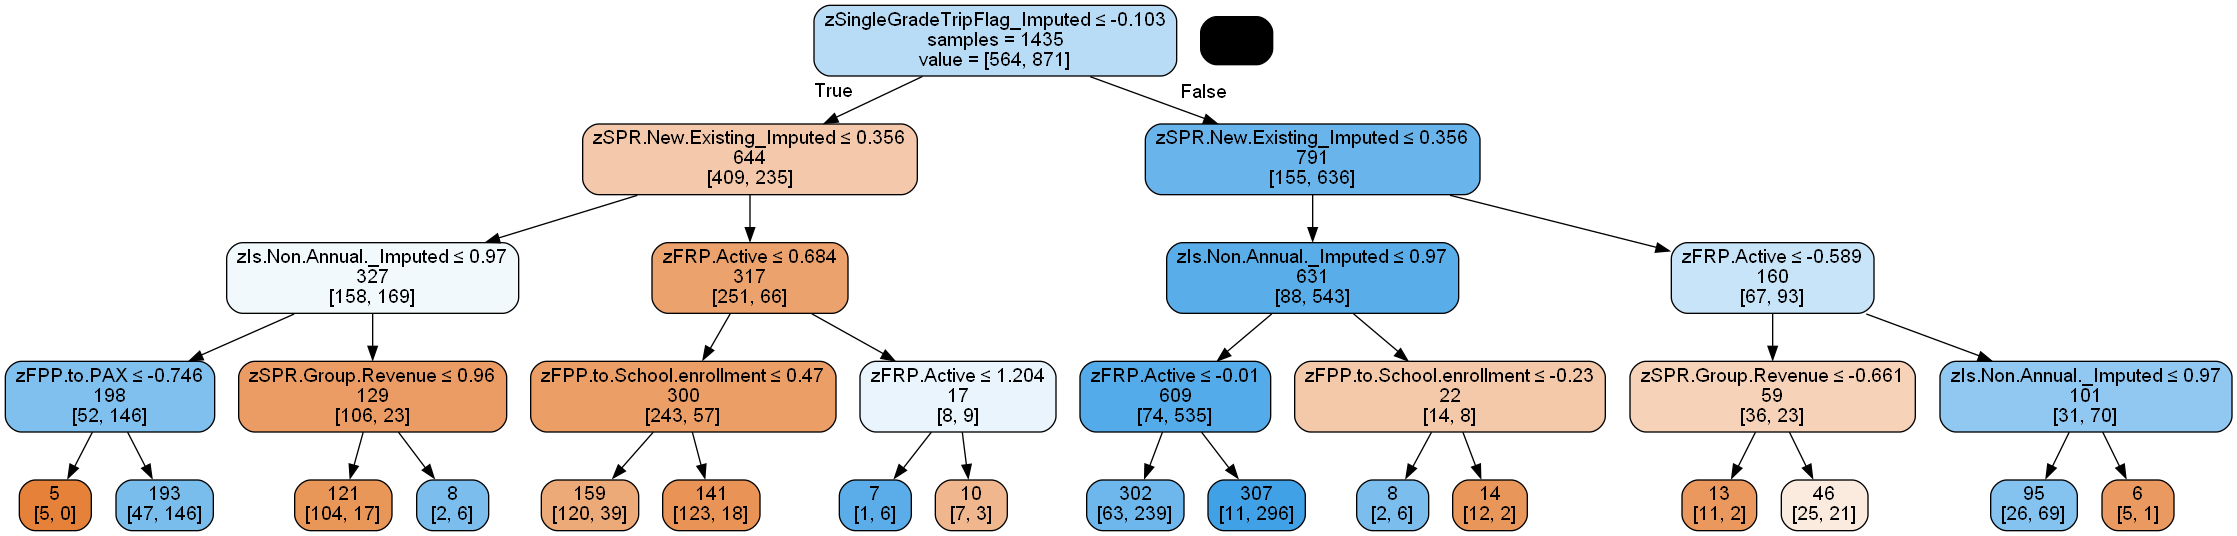

In [444]:
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

In [339]:
classificationSummary(train_y, bestClassTree.predict(train_X))
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8223)

       Prediction
Actual   0   1
     0 412 152
     1 103 768
Confusion Matrix (Accuracy 0.7889)

       Prediction
Actual   0   1
     0 256 118
     1  84 499


In [489]:
import statsmodels.api as sm
table = sm.stats.Table2x2(np.array([[256, 118], [84, 499]]))
table.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,12.888,,9.379,17.709,0.000
Log odds ratio,2.556,0.162,2.238,2.874,0.000
Risk ratio,4.751,,3.853,5.858,0.000
Log risk ratio,1.558,0.107,1.349,1.768,0.000


In [445]:
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

                        feature  importance       std
5           zFrom.Grade_Imputed    0.059246  0.031059
6       zIs.Non.Annual._Imputed    0.097837  0.041570
1      zTotal.School.Enrollment    0.107227  0.019974
8     zSPR.New.Existing_Imputed    0.111075  0.042315
7  zSingleGradeTripFlag_Imputed    0.115630  0.072708
0                   zFRP.Active    0.116674  0.027122
2            zSPR.Group.Revenue    0.128700  0.023030
3     zFPP.to.School.enrollment    0.128869  0.021035
4                   zFPP.to.PAX    0.134742  0.025168


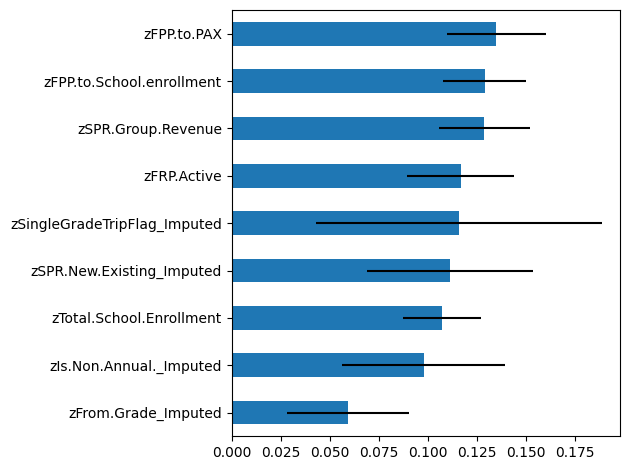

In [446]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df2 = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df2 = df2.sort_values('importance')
print(df2)

ax = df2.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [447]:
classificationSummary(valid_y, rf.predict(valid_X))

Confusion Matrix (Accuracy 0.7941)

       Prediction
Actual   0   1
     0 250 124
     1  73 510


In [448]:
import statsmodels.api as sm
table = sm.stats.Table2x2(np.array([[250, 124], [73, 510]]))
table.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,14.085,,10.163,19.521,0.000
Log odds ratio,2.645,0.167,2.319,2.971,0.000
Risk ratio,5.338,,4.258,6.693,0.000
Log risk ratio,1.675,0.115,1.449,1.901,0.000


In [449]:
boost = GradientBoostingClassifier()
boost.fit(train_X, train_y)

GradientBoostingClassifier()

In [450]:
classificationSummary(valid_y, boost.predict(valid_X))

Confusion Matrix (Accuracy 0.7962)

       Prediction
Actual   0   1
     0 259 115
     1  80 503


In [451]:
import statsmodels.api as sm
table = sm.stats.Table2x2(np.array([[259, 115], [80, 503]]))
table.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,14.161,,10.259,19.546,0.000
Log odds ratio,2.650,0.164,2.328,2.973,0.000
Risk ratio,5.047,,4.073,6.254,0.000
Log risk ratio,1.619,0.109,1.404,1.833,0.000


Logit

In [452]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
#from mord import LogisticIT #If you're looking for ordinal multi-class (more than 2 levels)
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score


In [453]:
predictors = ['FRP.Active','FPP.to.School.enrollment', 'FPP.to.PAX','Is.Non.Annual._Imputed','SingleGradeTripFlag_Imputed','SPR.New.Existing_Imputed']  
outcome = ['Retained.in.2012.']


# partition data
X = df[predictors]
y = df[outcome]

#convert to dummy variables


#Separate X and y variables

#train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=20)

logit_reg = sm.GLM(y, X, family=sm.families.Binomial())

#Fit and print results
logit_reg.fit().summary()



# print performtrain_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=20)






<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      Retained.in.2012.   No. Observations:                 2392
Model:                            GLM   Df Residuals:                     2386
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1104.4
Date:                Wed, 26 Apr 2023   Deviance:                       2208.7
Time:                        09:51:23   Pearson chi2:                 2.55e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3403
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
FRP.Active                      0.0389      0.005      7.725      0.000       0.029       0.049
FPP.to.School.enrollment       -0.5622      0.668     -0.842      0.400      -1.870       0.746
FPP.to.PAX                      0.2949      0.134      2.198      0.028       0.032       0.558
Is.Non.Annual._Imputed         -2.4945      0.174    -14.374      0.000      -2.835      -2.154
SingleGradeTripFlag_Imputed     1.1184      0.111     10.082      0.000       0.901       1.336
SPR.New.Existing_Imputed       -1.5169      0.113    -13.420      0.000      -1.738      -1.295
===============================================================================================
"""

In [454]:

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=20)
# fit a logistic regression (set penalty=l2 (a penalty of L2 will force some coefficients to be small, 
#essentially focusing on a fewer variables) and C=1e42 avoids regularization, C denotes how strong we want 
#regularization to be. A smaller C will make regularization stronger ) other solvers are available, we can explore
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

#Get intercepts, coefficients, and AIC
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print() #Creates a Line space
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  -1.824349468222632
       FRP.Active  FPP.to.School.enrollment  FPP.to.PAX  \
coeff    0.040491                  0.189495     2.38318   

       Is.Non.Annual._Imputed  SingleGradeTripFlag_Imputed  \
coeff               -2.837825                     0.874364   

       SPR.New.Existing_Imputed  
coeff                 -1.512815  

AIC 8573.747004282925


In [455]:

logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y.values.flatten(), 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })
#valid_y.values.flatten() if one-dimensional error appears



In [477]:
#Use the classification summary function for validation data - more useful
logit_reg_pred = logit_reg.predict(valid_X)
classificationSummary(valid_y, logit_reg_pred)

Confusion Matrix (Accuracy 0.8036)

       Prediction
Actual   0   1
     0 263 103
     1  85 506


In [478]:
import statsmodels.api as sm
table = sm.stats.Table2x2(np.array([[263, 103], [85, 506]]))
table.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,15.200,,10.998,21.007,0.000
Log odds ratio,2.721,0.165,2.398,3.045,0.000
Risk ratio,4.996,,4.062,6.145,0.000
Log risk ratio,1.609,0.106,1.402,1.816,0.000


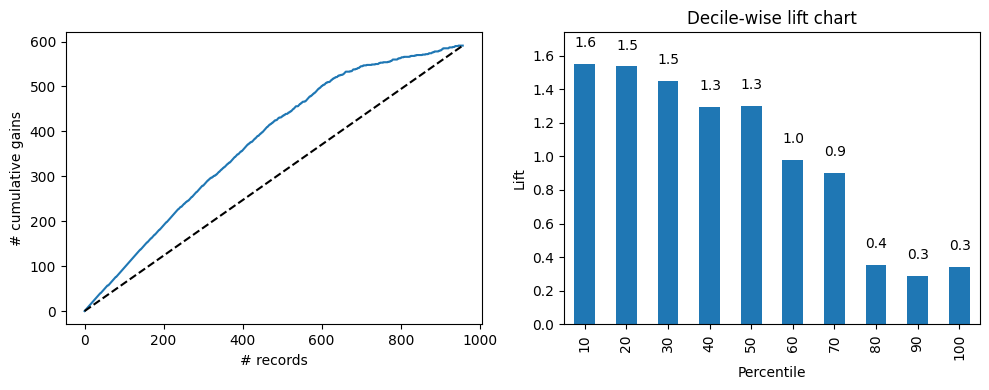

In [474]:
df3 = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df3.actual, ax=axes[0])
liftChart(df3.actual, title='Decile-wise lift chart', ax=axes[1])
    
plt.tight_layout()
plt.show()

In [498]:
newCust = pd.DataFrame([{'FRP.Active':12,'FPP.to.School.enrollment':1,'FPP.to.PAX':0.9,  'Is.Non.Annual._Imputed':0,'SingleGradeTripFlag_Imputed':1.0,'SPR.New.Existing_Imputed':1,}])
newCust

,FRP.Active,FPP.to.School.enrollment,FPP.to.PAX,Is.Non.Annual._Imputed,SingleGradeTripFlag_Imputed,SPR.New.Existing_Imputed
0,12,1,0.9,0,1.0,1


In [510]:
#Use the classification summary function for validation data - more useful
valid_y=[1]
logit_reg_pred = logit_reg.predict(newCust)
print(logit_reg_pred)
classificationSummary(valid_y,logit_reg_pred)

[1.]
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual 0
     0 1


In [511]:
import statsmodels.api as sm
table = sm.stats.Table2x2(np.array([[0, 0], [0, 1]]))
table.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,2.000,,0.011,357.353,0.793
Log odds ratio,0.693,2.646,-4.492,5.879,0.793
Risk ratio,1.500,,0.075,29.945,0.791
Log risk ratio,0.405,1.528,-2.588,3.399,0.791


In [472]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

# define the Logistic Regression classifier
classifier_LR = LogisticRegression(random_state=40)

# cross-validation for logistic regression model
lr_scores = cross_val_score(estimator=classifier_LR, X=train_X, y=train_y, cv=5)
print("Logistic Regression CV mean score: ", lr_scores.mean())
print("Logistic Regression CV std deviation: ", lr_scores.std())

# cross-validation for decision tree model
dt_scores = cross_val_score(estimator=classTree, X=train_X, y=train_y, cv=5)
print("Decision Tree CV mean score: ", dt_scores.mean())
print("Decision Tree CV std deviation: ", dt_scores.std())

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# create a KNN classifier object with k= 39
classifier_KNN = KNeighborsClassifier(n_neighbors=9)

# cross-validation for KNN model
knn_scores = cross_val_score(estimator=classifier_KNN, X=train_X, y=train_y, cv=5)
print("kNN CV mean score: ", knn_scores.mean())
print("kNN CV std deviation: ", knn_scores.std())



Logistic Regression CV mean score:  0.8034843205574914
Logistic Regression CV std deviation:  0.015362653439058243
Decision Tree CV mean score:  0.7881533101045296
Decision Tree CV std deviation:  0.017684428627804227
kNN CV mean score:  0.7630662020905923
kNN CV std deviation:  0.02043606731514312
